# Import library

In [1]:
import os
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageDraw

from scipy import io

# MPII Face Gaze

## Contents:
1. Function: 함수 정의
2. Load data: 데이터 로드
3. Use case: 사용 예시
4. temporary: 사용하려 했던 코드.. 무시하세요..
5. for manuscript: 논문 그림

## Function

In [17]:
def drawPoint(image, point):
    radius = 3
    RGB = (0, 255, 0)
    
    p_num = int(len(point)/2)
    draw = ImageDraw.Draw(image)
    
    for i in range(p_num):
        x = point[i * 2]
        y = point[i * 2 + 1]
        draw.ellipse((x-radius, y-radius, x+radius, y+radius), fill=RGB)

    return image

In [87]:
def drawOutputPoint2Image(image, point):
    radius = 10
    RGB = (255, 0, 0)
    
    draw = ImageDraw.Draw(image)
    
    x, y = point
    draw.ellipse((x-radius, y-radius, x+radius, y+radius), fill=RGB)

    return image

In [19]:
def drawOutputPoint(ms, point):
    radius = 10
    RGB = (255, 0, 0)    
    
    x, y = point
    
    plt.scatter(x, y, c='r')
    plt.xlim([ms[0], 0])
    plt.ylim([ms[1], 0])

    return plt

In [4]:
def viewAllImageWithCalibration():
    for i, pcp in enumerate(list_img_path):
        for j, file in enumerate(pcp):
            print(file)
            
            img = Image.open(file)
            img = drawPoint(img, list_cal[i].iloc[j,3:15].values)
            
            plt.imshow(np.array(img))
            plt.show()

In [8]:
def viewOnePcpWithCalibration(i_pcp):
    pcp = list_img_path[i_pcp]
    for j, file in enumerate(pcp):
        print(file)

        img = Image.open(file)
        img = drawPoint(img, list_cal[i_pcp].iloc[j,3:15].values)

        plt.imshow(np.array(img))
        plt.show()

In [137]:
def viewAllImageWithCalibrationOutput():
    for i, pcp in enumerate(list_img_path):
        for j, file in enumerate(pcp):
            print(file)
            plt.figure(figsize=(8,8))
            
            img = Image.open(file)
            img = drawPoint(img, list_cal[i].iloc[j,3:15].values)         

            plt.subplot(2, 1, 1)
            plt.imshow(np.array(img))
            
            plt.subplot(2, 1, 2)
            drawOutputPoint(ms=list_moniter_size[i][0:2], point=list_cal[i].iloc[j, 1:3].values)            

            plt.tight_layout()
            plt.show()

In [139]:
def viewOnePcpWithCalibrationOutput(i_pcp):
    pcp = list_img_path[i_pcp]
    for j, file in enumerate(pcp):
        print(file)
        plt.figure(figsize=(8,8))

        img = Image.open(file)
        img = drawPoint(img, list_cal[i_pcp].iloc[j,3:15].values)
        
        plt.subplot(2, 1, 1)
        plt.imshow(np.array(img))

        plt.subplot(2, 1, 2)
        drawOutputPoint(ms=list_moniter_size[i_pcp][0:2], point=list_cal[i_pcp].iloc[j, 1:3].values) 

        plt.show()

## Load data

In [3]:
root = "../../_data/MPIIFaceGaze/"
list_dir = [root+x for x in os.listdir(root) if os.path.isdir(root+x)]

list_img_path = []
list_cal_path = []
list_moniter_size = []

for pcp in list_dir: # pcp: participant
    list_img_path.append([])
    
    for day in os.listdir(pcp):
        path = pcp + '/' + day
        
        if day[0] == 'd':            
            for file in os.listdir(path):
                list_img_path[-1].append(path + '/' + file)
                
        elif day[0] == 'C':
            mat_file = io.loadmat(path + "/screenSize.mat")
            h_pixel = np.squeeze(mat_file["height_pixel"])
            w_pixel = np.squeeze(mat_file["width_pixel"])
            list_moniter_size.append(np.array((int(w_pixel), int(h_pixel))))
                
        elif os.path.isfile(path):
            list_cal_path.append(path)
            

list_cal = []
for file in list_cal_path:
    list_cal.append(pd.read_csv(file, header=None, sep=' '))

## Use case

../data/MPIIFaceGaze/p00/day01/0005.jpg


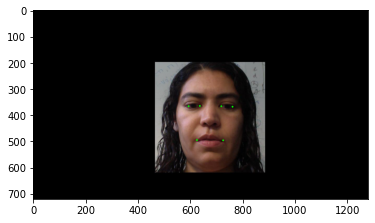

../data/MPIIFaceGaze/p00/day01/0030.jpg


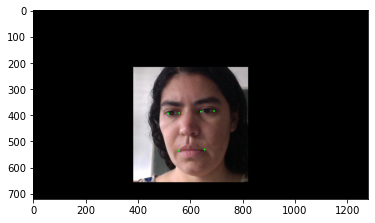

../data/MPIIFaceGaze/p00/day01/0031.jpg


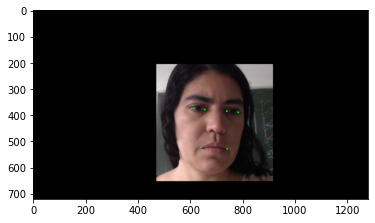

../data/MPIIFaceGaze/p00/day01/0038.jpg


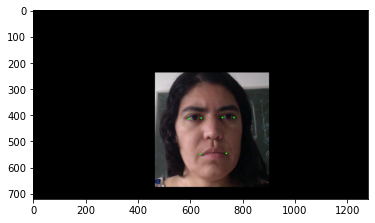

../data/MPIIFaceGaze/p00/day01/0063.jpg


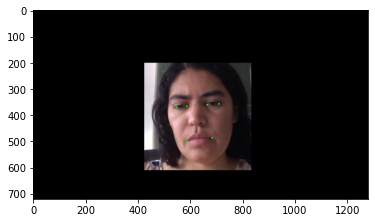

../data/MPIIFaceGaze/p00/day01/0087.jpg


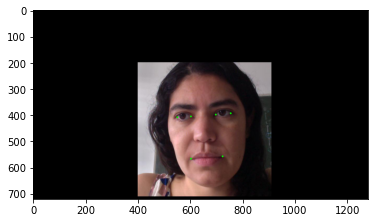

../data/MPIIFaceGaze/p00/day01/0092.jpg


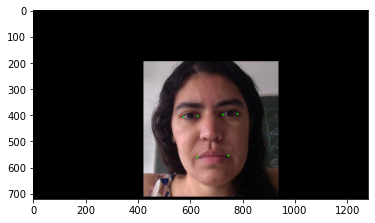

../data/MPIIFaceGaze/p00/day01/0109.jpg


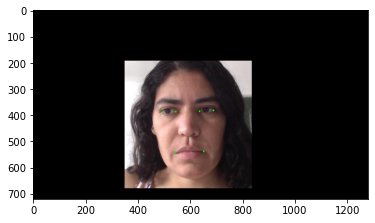

../data/MPIIFaceGaze/p00/day01/0119.jpg


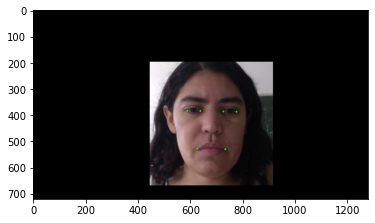

../data/MPIIFaceGaze/p00/day01/0124.jpg


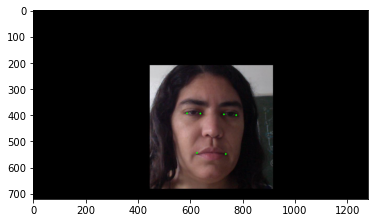

../data/MPIIFaceGaze/p00/day01/0125.jpg


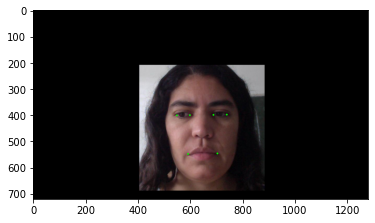

../data/MPIIFaceGaze/p00/day01/0131.jpg


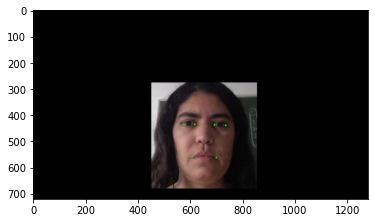

../data/MPIIFaceGaze/p00/day01/0141.jpg


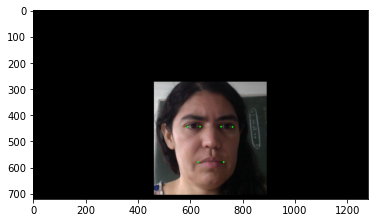

../data/MPIIFaceGaze/p00/day01/0146.jpg


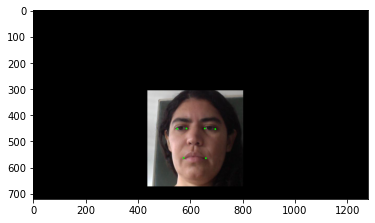

../data/MPIIFaceGaze/p00/day01/0156.jpg


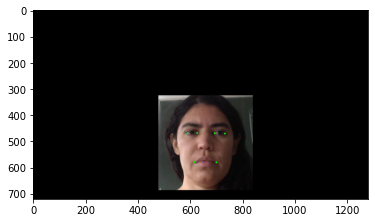

../data/MPIIFaceGaze/p00/day01/0161.jpg


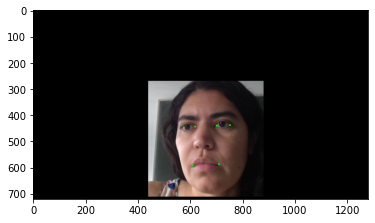

../data/MPIIFaceGaze/p00/day01/0162.jpg


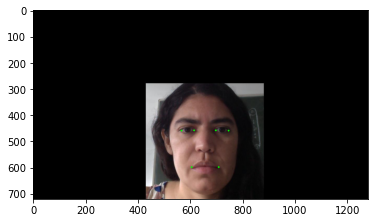

../data/MPIIFaceGaze/p00/day01/0164.jpg


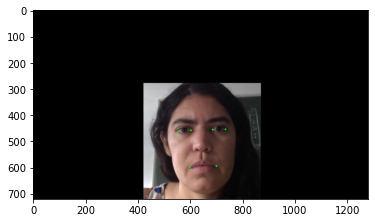

../data/MPIIFaceGaze/p00/day01/0171.jpg


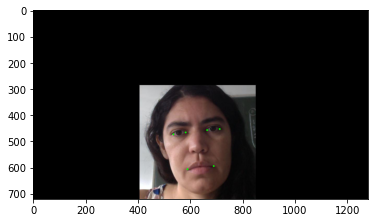

../data/MPIIFaceGaze/p00/day01/0190.jpg


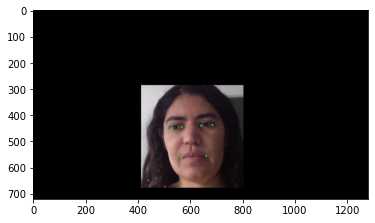

../data/MPIIFaceGaze/p00/day01/0204.jpg


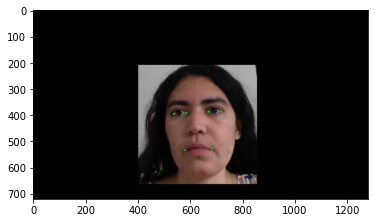

../data/MPIIFaceGaze/p00/day01/0225.jpg


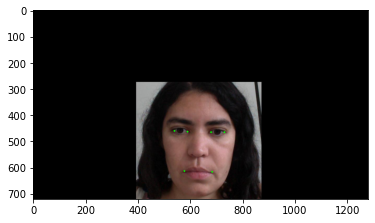

../data/MPIIFaceGaze/p00/day01/0245.jpg


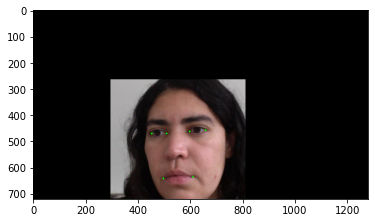

../data/MPIIFaceGaze/p00/day01/0252.jpg


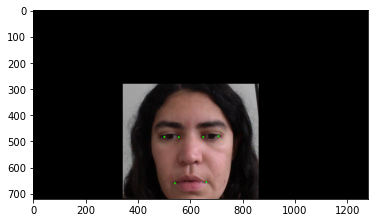

../data/MPIIFaceGaze/p00/day01/0254.jpg


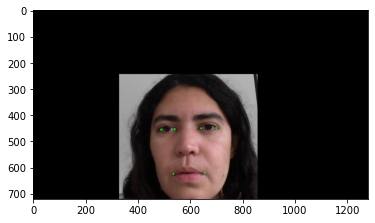

../data/MPIIFaceGaze/p00/day01/0267.jpg


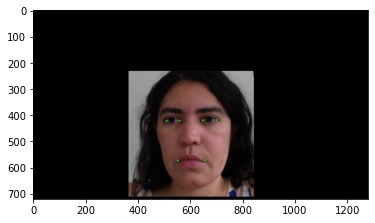

../data/MPIIFaceGaze/p00/day01/0275.jpg


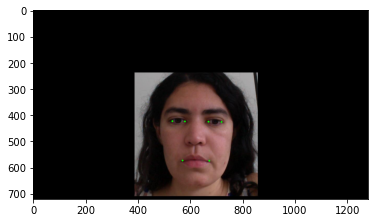

../data/MPIIFaceGaze/p00/day01/0286.jpg


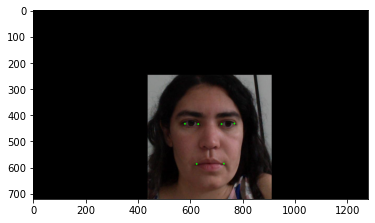

../data/MPIIFaceGaze/p00/day01/0287.jpg


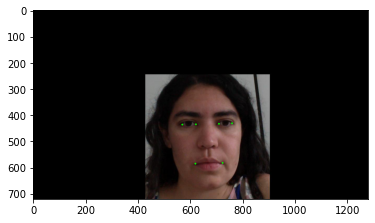

../data/MPIIFaceGaze/p00/day01/0293.jpg


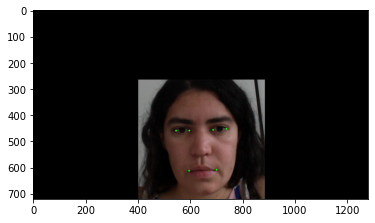

../data/MPIIFaceGaze/p00/day01/0322.jpg


KeyboardInterrupt: 

In [7]:
viewAllImageWithCalibration()

../data/MPIIFaceGaze/p05/day01/0004.jpg


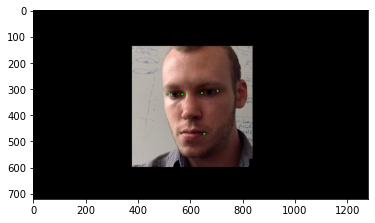

../data/MPIIFaceGaze/p05/day01/0007.jpg


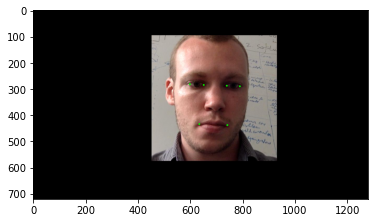

../data/MPIIFaceGaze/p05/day01/0011.jpg


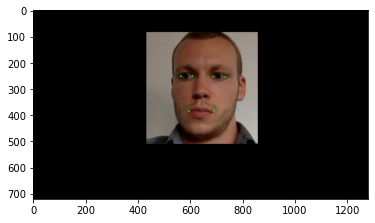

../data/MPIIFaceGaze/p05/day01/0012.jpg


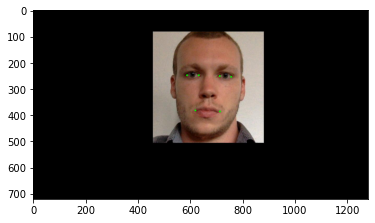

../data/MPIIFaceGaze/p05/day01/0045.jpg


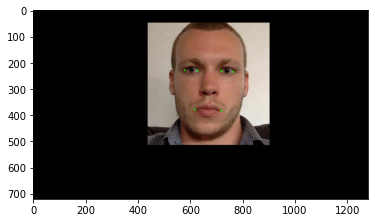

../data/MPIIFaceGaze/p05/day01/0047.jpg


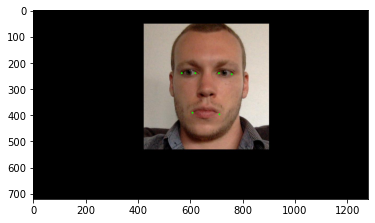

../data/MPIIFaceGaze/p05/day01/0050.jpg


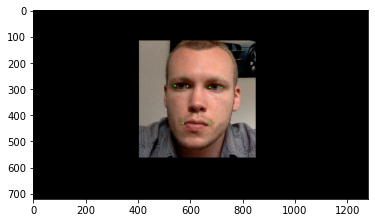

../data/MPIIFaceGaze/p05/day01/0056.jpg


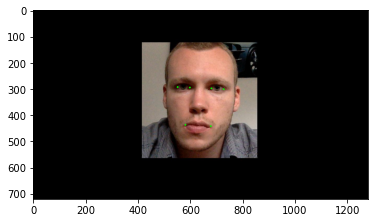

../data/MPIIFaceGaze/p05/day01/0058.jpg


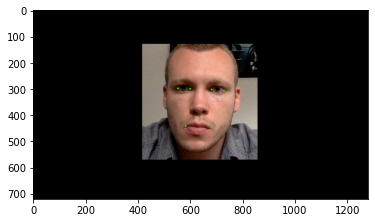

../data/MPIIFaceGaze/p05/day01/0068.jpg


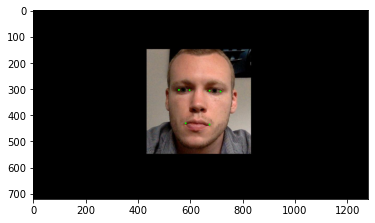

../data/MPIIFaceGaze/p05/day01/0074.jpg


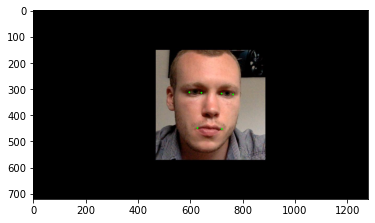

../data/MPIIFaceGaze/p05/day01/0084.jpg


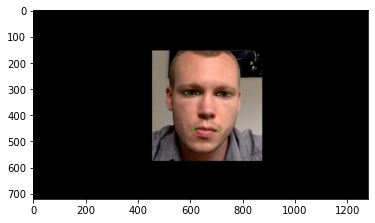

../data/MPIIFaceGaze/p05/day01/0090.jpg


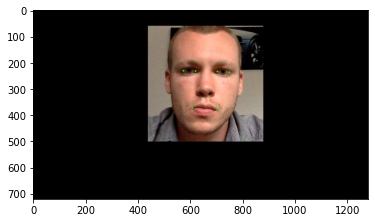

../data/MPIIFaceGaze/p05/day01/0091.jpg


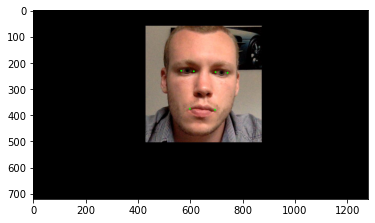

../data/MPIIFaceGaze/p05/day01/0093.jpg


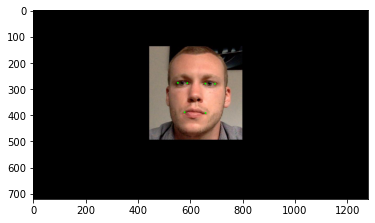

../data/MPIIFaceGaze/p05/day01/0096.jpg


KeyboardInterrupt: 

In [10]:
viewOnePcpWithCalibration(5)

../data/MPIIFaceGaze/p00/day01/0005.jpg


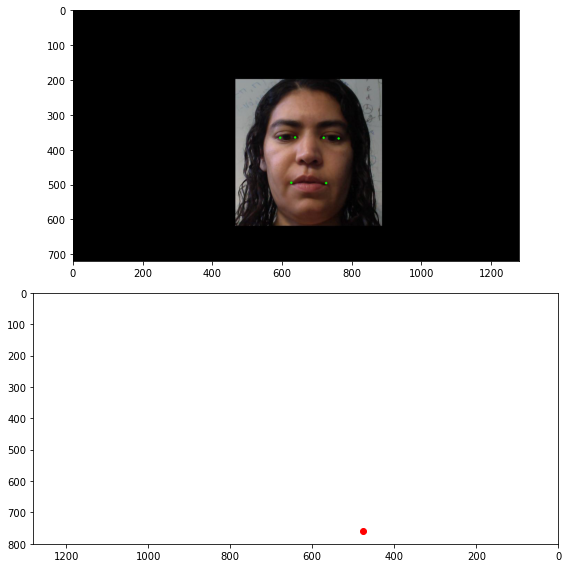

../data/MPIIFaceGaze/p00/day01/0030.jpg


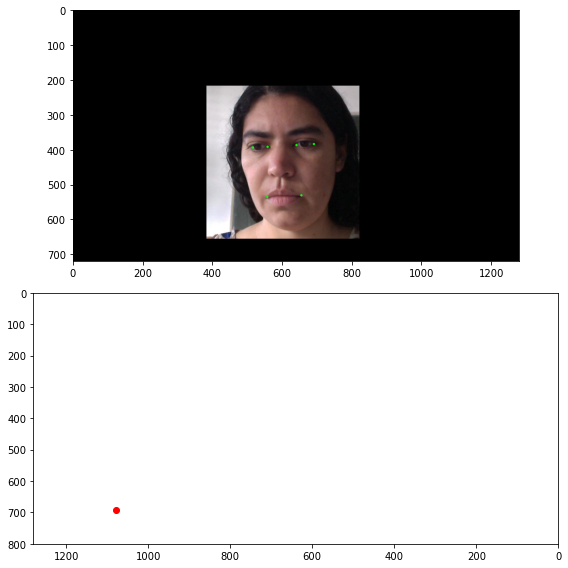

../data/MPIIFaceGaze/p00/day01/0031.jpg


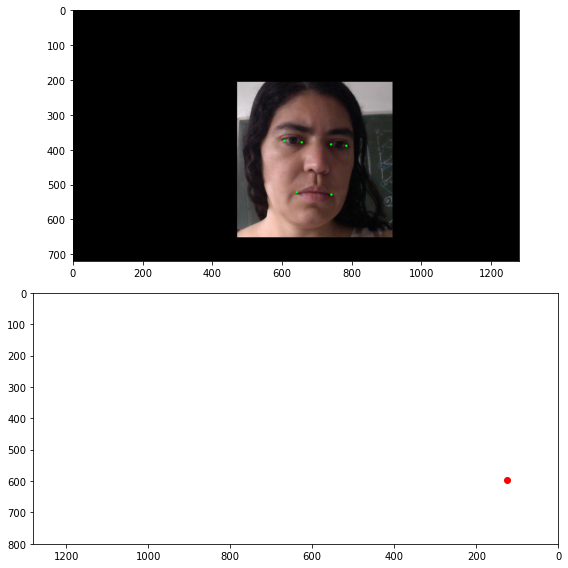

../data/MPIIFaceGaze/p00/day01/0038.jpg


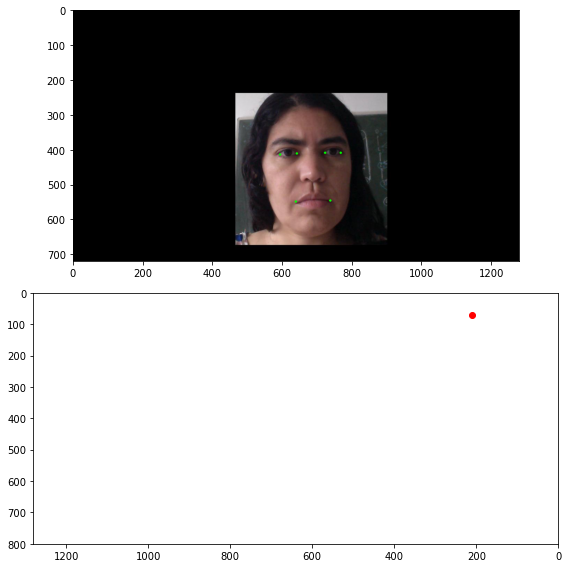

../data/MPIIFaceGaze/p00/day01/0063.jpg


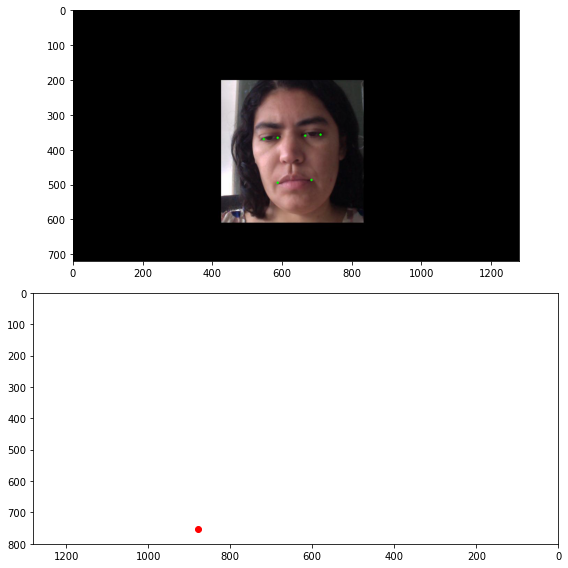

../data/MPIIFaceGaze/p00/day01/0087.jpg


KeyboardInterrupt: 

In [141]:
viewAllImageWithCalibrationOutput()

../data/MPIIFaceGaze/p05/day01/0004.jpg


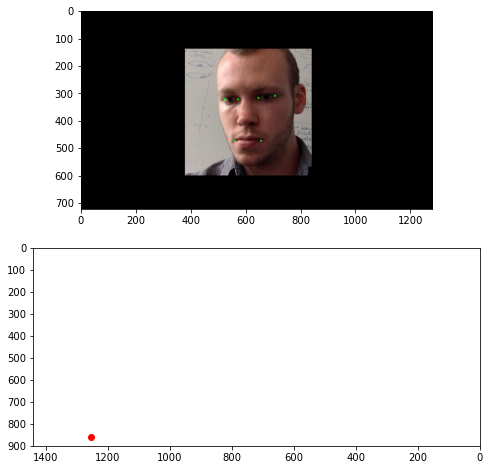

../data/MPIIFaceGaze/p05/day01/0007.jpg


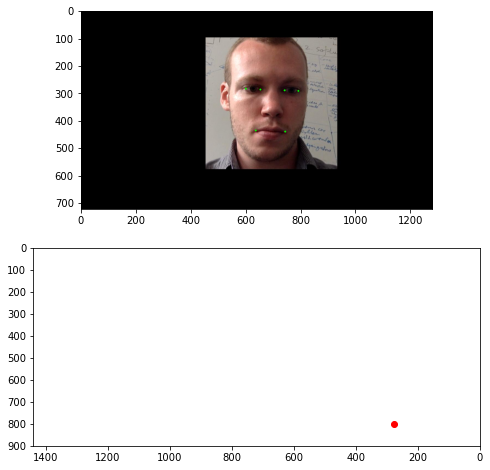

../data/MPIIFaceGaze/p05/day01/0011.jpg


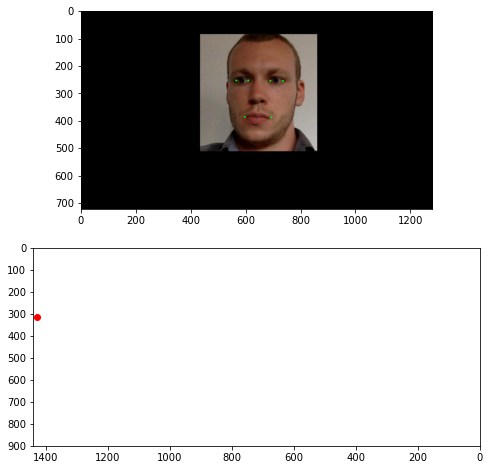

../data/MPIIFaceGaze/p05/day01/0012.jpg


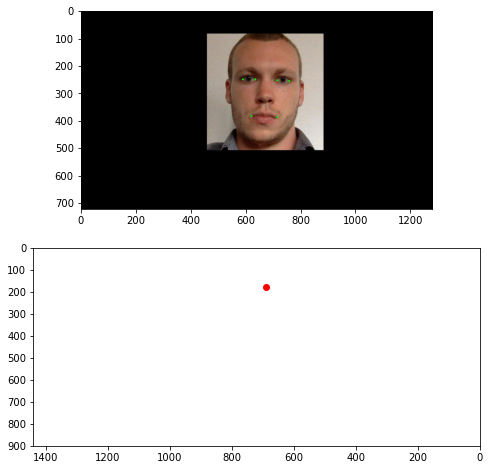

../data/MPIIFaceGaze/p05/day01/0045.jpg


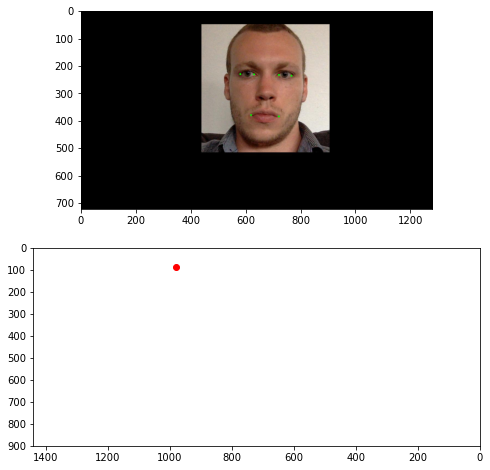

../data/MPIIFaceGaze/p05/day01/0047.jpg


KeyboardInterrupt: 

In [140]:
viewOnePcpWithCalibrationOutput(5)

## temporary

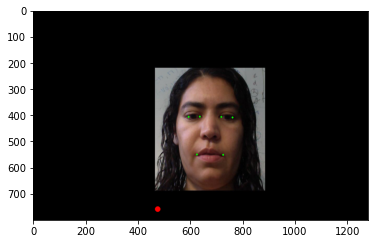

In [70]:
img = drawPoint(img, list_cal[0].iloc[0,3:15].values)
            
img = img.resize(list_moniter_size[0], resample=Image.BICUBIC)
img = drawOutputPoint(img, list_cal[0].iloc[0,1:3].values)

plt.imshow(np.array(img))

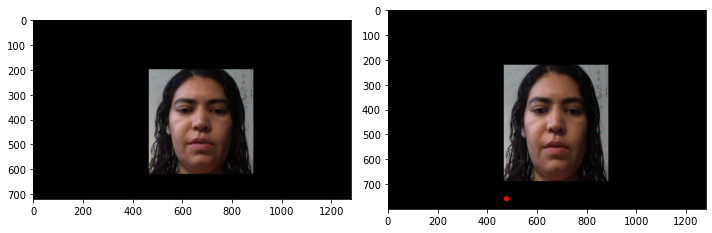

In [75]:
img = Image.open(root + "p00/day01/0005.jpg")

plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.imshow(np.array(img))

plt.subplot(1, 2, 2)
img = img.resize(list_moniter_size[0], resample=Image.BICUBIC)
img = drawOutputPoint(img, list_cal[0].iloc[0,1:3].values)
plt.imshow(np.array(img))

plt.tight_layout()
plt.show()

# Gaze Capture

## Function

In [51]:
def drawRectangle(image, hwxy, rgb):
    width = 5
    RGB = rgb
    
    draw = ImageDraw.Draw(image)
    
    h, w, x, y = hwxy
    draw.rectangle(xy=[(x,y), (x+w, y+h)], outline=RGB, width=width)

    return image

In [53]:
def drawRectangleEye(image, face_xy, hwxy, rgb):
    width = 5
    RGB = rgb
    
    draw = ImageDraw.Draw(image)
    
    h, w, x, y = hwxy
    x = face_xy[0] + x
    y = face_xy[1] + y
    draw.rectangle(xy=[(x,y), (x+w, y+h)], outline=RGB, width=width)

    return image

In [69]:
def viewAllImageWithCalibration():
    for i, sub in enumerate(list_dir):
        path = sub + "/frames/"

        for j, file in enumerate(os.listdir(path)):
            img = Image.open(path+file)

            for k, j_type in enumerate(json_type):
                if j_type[5] == 'F':
                    img = drawRectangle(img, data[i][k].iloc[j][0:4].values, rgb=(0,255,255))
                elif j_type[5] == 'L':
                    img = drawRectangleEye(img, data[i][0].iloc[j][2:4].values, data[i][k].iloc[j][0:4].values, rgb=(255,0,0))
                elif j_type[5] == 'R':
                    drawRectangleEye(img, data[i][0].iloc[j][2:4].values, data[i][k].iloc[j][0:4].values, rgb=(255,255,0))

            plt.imshow(np.array(img))   
            plt.show()

## Load data

In [11]:
root = "../data/GazeCapture/"
json_type = ["appleFace.json", "appleLeftEye.json", "appleRightEye.json"]

list_dir = [root+x for x in os.listdir(root) if os.path.isdir(root+x)]

data = []
for sub in list_dir:
    data.append([])
    for j_type in json_type:
        path = sub + '/' + j_type
        with open(path) as file:
            data[-1].append(pd.DataFrame(json.load(file)))

## Use case

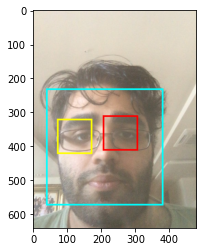

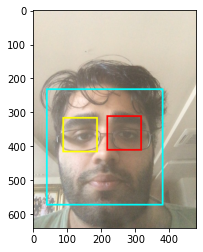

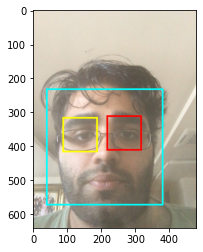

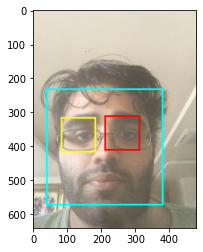

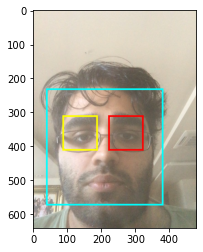

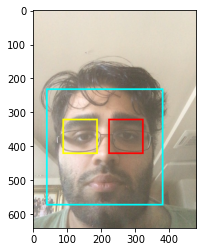

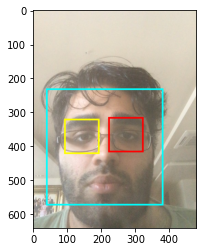

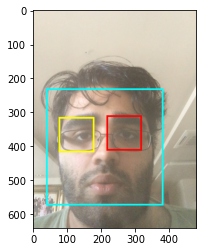

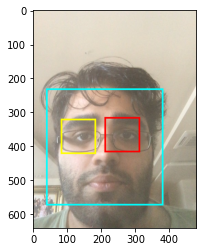


KeyboardInterrupt



In [70]:
viewAllImageWithCalibration()